In [1]:
import os
import pathlib
from metrics_tools.builder.controller import MetricsController

CURR_DIR = pathlib.Path().cwd()
REPO_DIR = os.path.abspath(os.path.join(CURR_DIR, "../../../"))
SQLMESH_DIR = os.path.abspath(os.path.join(REPO_DIR, "warehouse/metrics_mesh"))

controller = MetricsController.setup(
    path=SQLMESH_DIR, 
    gateway="local",
)


In [3]:
controller.load()
dag = controller.models_dag()

for name in dag.sorted:
    print(name)

"new-test"."sources"."artifacts_by_project_v1"
"new-test"."sources"."projects_by_collection_v1"
"new-test"."sources"."timeseries_events_aux_issues_by_artifact_v0"
"new-test"."sources"."timeseries_events_by_artifact_v0"
"new-test"."metrics"."events_daily_to_artifact"
"new-test"."metrics"."first_of_event_from_artifact"
"new-test"."metrics"."issue_event_time_deltas"
"new-test"."metrics"."last_of_event_from_artifact"
"new-test"."metrics"."active_addresses_aggregation_to_artifact_daily"
"new-test"."metrics"."active_addresses_aggregation_to_artifact_monthly"
"new-test"."metrics"."active_addresses_aggregation_to_collection_daily"
"new-test"."metrics"."active_addresses_aggregation_to_collection_monthly"
"new-test"."metrics"."active_addresses_aggregation_to_project_daily"
"new-test"."metrics"."active_addresses_aggregation_to_project_monthly"
"new-test"."metrics"."active_addresses_rolling_to_artifact_over_180_day_window"
"new-test"."metrics"."active_addresses_rolling_to_artifact_over_30_day_wind

rewriting: "new-test"."sqlmesh__metrics"."metrics__contributors_lifecycle_to_project_over_30_day_window__3236233182"
SELECT * FROM "new-test"."sqlmesh__metrics"."metrics__contributors_lifecycle_to_project_over_30_day_window__3236233182" WHERE to_project_id = 'H1DdvseIeFYJUwYwfSNvsXvbgxfwasspZw2MT3Apkfg=' AND metric LIKE 'churn%' ORDER BY metrics_sample_date NULLS FIRST
metrics_sample_date    datetime64[us]
event_source                   object
to_project_id                  object
from_artifact_id               object
metric                         object
amount                        float64
dtype: object
H1DdvseIeFYJUwYwfSNvsXvbgxfwasspZw2MT3Apkfg=


/home/raven/development/opensource-observer/oso/warehouse/metrics_tools/builder/controller.py:78: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(nbins=5)


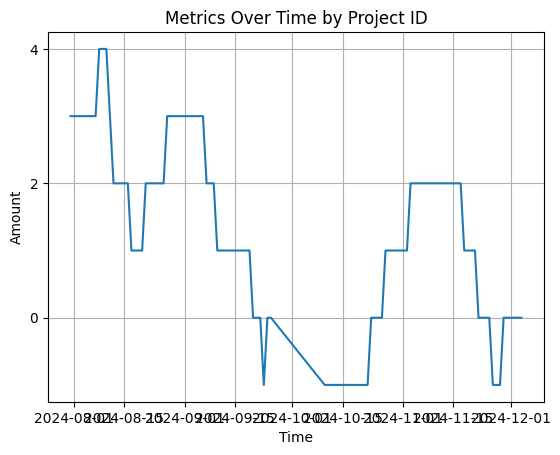

In [ ]:
controller.plot(
    """
        SELECT * FROM metrics.contributors_lifecycle_to_project_over_30_day_window 
        where to_project_id = 'H1DdvseIeFYJUwYwfSNvsXvbgxfwasspZw2MT3Apkfg='
          and metric LIKE 'churn%'
        order by metrics_sample_date
    """, 
    "to_project_id"
    
)

rewriting: "new-test"."sqlmesh__metrics"."metrics__contributor_classifications_to_project_over_30_day_window__3344922899"
SELECT * FROM "new-test"."sqlmesh__metrics"."metrics__contributor_classifications_to_project_over_30_day_window__3344922899" WHERE to_project_id = 'H1DdvseIeFYJUwYwfSNvsXvbgxfwasspZw2MT3Apkfg=' AND metric LIKE 'active%' ORDER BY metrics_sample_date NULLS FIRST
metrics_sample_date    datetime64[us]
event_source                   object
to_project_id                  object
from_artifact_id               object
metric                         object
amount                        float64
dtype: object
H1DdvseIeFYJUwYwfSNvsXvbgxfwasspZw2MT3Apkfg=


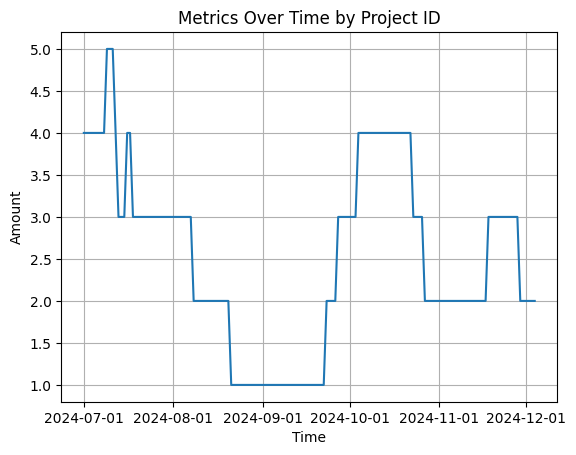

In [ ]:
controller.plot(
        """
        SELECT * FROM metrics.contributor_classifications_to_project_over_30_day_window 
        where to_project_id = 'H1DdvseIeFYJUwYwfSNvsXvbgxfwasspZw2MT3Apkfg='
          and metric LIKE 'active%'
        order by metrics_sample_date
        """, 
        "to_project_id"
)

In [8]:
df = controller.fetchdf("""
    SELECT events.metrics_sample_date, abp.project_name, abp.project_id, metric, MIN(events.amount) 
    FROM metrics.contributors_lifecycle_to_project_over_30_day_window as events
    INNER JOIN sources.artifacts_by_project_v1 as abp
      ON abp.project_id = events.to_project_id
    where metric LIKE 'churned_%' and abp.project_name = 'opensource-observer'
    group by 1, 2, 3, 4
    order by metrics_sample_date
""")

df

rewriting: "new-test"."sqlmesh__metrics"."metrics__contributors_lifecycle_to_project_over_30_day_window__3236233182"
SELECT events.metrics_sample_date, abp.project_name, abp.project_id, metric, MIN(events.amount) FROM "new-test"."sqlmesh__metrics"."metrics__contributors_lifecycle_to_project_over_30_day_window__3236233182" AS events INNER JOIN sources.artifacts_by_project_v1 AS abp ON abp.project_id = events.to_project_id WHERE metric LIKE 'churned_%' AND abp.project_name = 'opensource-observer' GROUP BY 1, 2, 3, 4 ORDER BY metrics_sample_date NULLS FIRST


,metrics_sample_date,project_name,project_id,metric,min(events.amount)
0,2024-07-31,opensource-observer,Erx9J64anc8oSeN-wDKm0sojJf8ONrFVYbQ7GFnqSyc=,churned_contributors_over_30_day_window,41.0
1,2024-08-01,opensource-observer,Erx9J64anc8oSeN-wDKm0sojJf8ONrFVYbQ7GFnqSyc=,churned_contributors_over_30_day_window,41.0
2,2024-08-02,opensource-observer,Erx9J64anc8oSeN-wDKm0sojJf8ONrFVYbQ7GFnqSyc=,churned_contributors_over_30_day_window,41.0
3,2024-08-03,opensource-observer,Erx9J64anc8oSeN-wDKm0sojJf8ONrFVYbQ7GFnqSyc=,churned_contributors_over_30_day_window,38.0
4,2024-08-04,opensource-observer,Erx9J64anc8oSeN-wDKm0sojJf8ONrFVYbQ7GFnqSyc=,churned_contributors_over_30_day_window,23.0
...,...,...,...,...,...
122,2024-11-30,opensource-observer,Erx9J64anc8oSeN-wDKm0sojJf8ONrFVYbQ7GFnqSyc=,churned_contributors_over_30_day_window,24.0
123,2024-12-01,opensource-observer,Erx9J64anc8oSeN-wDKm0sojJf8ONrFVYbQ7GFnqSyc=,churned_contributors_over_30_day_window,23.0
124,2024-12-02,opensource-observer,Erx9J64anc8oSeN-wDKm0sojJf8ONrFVYbQ7GFnqSyc=,churned_contributors_over_30_day_window,23.0
125,2024-12-03,opensource-observer,Erx9J64anc8oSeN-wDKm0sojJf8ONrFVYbQ7GFnqSyc=,churned_contributors_over_30_day_window,23.0
